#### 문장분류를 위한 합성곱 신경망
- 문장분류(긍정, 분류)
- I am a teacher

In [6]:
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout , Conv2D , MaxPooling2D , AveragePooling2D , GlobalMaxPooling2D , ZeroPadding2D , Flatten , Input

from tensorflow.keras.layers     import Conv1D , MaxPooling1D , Embedding , Reshape , concatenate

from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.datasets            import load_breast_cancer
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

# dataset
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.datasets       import imdb
from sklearn.datasets                import load_digits


- I am a teacher : 행렬에서 하나의 단어가 하나의 행을 차지하게 된다 ->embedding vector
- 합성곱 연산은 단어 단어로 이루어진다(행 단위)


In [17]:
print('num_words : 빈도 순으로 상위 몇 개의 단어를 포함시킬 것인가를 결정 - ')
(X_train, y_train) , (X_test , y_test) = imdb.load_data(num_words= 3000)

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [18]:
print('sequence_length : 각 문장의 최대 길이 - ')
sequence_length = 300
X_train = pad_sequences(X_train , maxlen = sequence_length)
X_test = pad_sequences(X_test , maxlen = sequence_length)

X_train.shape , y_train.shape , X_test.shape , y_test.shape

sequence_length : 각 문장의 최대 길이 - 


((25000, 300), (25000,), (25000, 300), (25000,))

In [25]:
print('output_dim : 각 단어를 표현하는 벡터 공간의 크기 - ')
def cnn_sentence_conv1d() :
  model = Sequential()

  model.add( Embedding(input_dim=3000 , output_dim=100 , input_length=sequence_length) )
  model.add( Conv1D(kernel_size= 5  , strides= 1 ,  filters=50 , padding='valid') )
  model.add( MaxPooling1D(pool_size = 2 , padding = 'valid')  )

  model.add( Flatten() ) 
  model.add( Dense(10 , activation='relu'))

  model.add( Dense(1  , activation='sigmoid') )

  model.compile(optimizer = Adam(learning_rate=0.001) , 
               loss = 'binary_crossentropy' , 
               metrics=['accuracy']) 
  
  return model
  

 


output_dim : 각 단어를 표현하는 벡터 공간의 크기 - 


In [26]:
# X_train.shape , y_train.shape , X_test.shape , y_test.shape
model = cnn_sentence_conv1d()
model_history = model.fit(X_train, y_train , batch_size= 50 , validation_split=0.2 , epochs=5 , verbose = 1 )

Epoch 1/5
400/400 [==============================] - 35s 86ms/step - loss: 0.4217 - accuracy: 0.7844 - val_loss: 0.3010 - val_accuracy: 0.8718
Epoch 2/5
400/400 [==============================] - 34s 85ms/step - loss: 0.2458 - accuracy: 0.9031 - val_loss: 0.3064 - val_accuracy: 0.8690
Epoch 3/5
400/400 [==============================] - 34s 86ms/step - loss: 0.1657 - accuracy: 0.9401 - val_loss: 0.3387 - val_accuracy: 0.8628
Epoch 4/5
400/400 [==============================] - 34s 85ms/step - loss: 0.0665 - accuracy: 0.9822 - val_loss: 0.4008 - val_accuracy: 0.8614
Epoch 5/5
400/400 [==============================] - 34s 85ms/step - loss: 0.0169 - accuracy: 0.9969 - val_loss: 0.5431 - val_accuracy: 0.8544


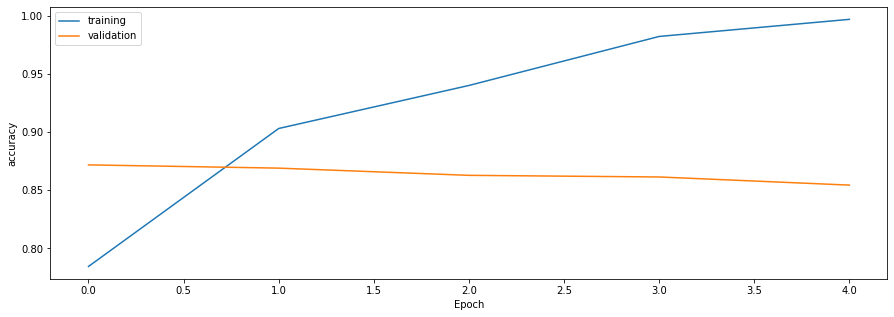

In [27]:
plt.figure(figsize=(15,5))

plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])

plt.legend(['training' , 'validation'] , loc='best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()

In [30]:
def cnn_improve_sentence_conv2d() :
  model = Sequential()

  model.add( Embedding(input_dim=3000 , output_dim=100 , input_length=sequence_length) )
  model.add( Reshape( (300, 100, 1), input_shape=(300, 100) ))

  model.add( Conv2D(kernel_size= (5,100)  , strides= (1,1) ,  filters=50 , padding='valid') )
  model.add( GlobalMaxPooling2D()  )

  
  model.add( Dense(10) )
  model.add( Activation('relu') )
  model.add( Dropout(0.3) ) 

  model.add( Dense(10) )
  model.add( Activation('relu') )
  model.add( Dropout(0.3) ) 

  model.add( Dense(1  , activation='sigmoid') )

  model.compile(optimizer = Adam(learning_rate=0.001) , 
               loss = 'binary_crossentropy' , 
               metrics=['accuracy']) 
  
  return model

In [31]:
model = cnn_improve_sentence_conv2d()


In [32]:
model_history = model.fit(X_train, y_train , batch_size= 50 , validation_split=0.2 , epochs=5 , verbose = 1 )

Epoch 1/5
400/400 [==============================] - 46s 115ms/step - loss: 0.5511 - accuracy: 0.7143 - val_loss: 0.3784 - val_accuracy: 0.8386
Epoch 2/5
400/400 [==============================] - 46s 114ms/step - loss: 0.3628 - accuracy: 0.8666 - val_loss: 0.3187 - val_accuracy: 0.8696
Epoch 3/5
400/400 [==============================] - 46s 114ms/step - loss: 0.2761 - accuracy: 0.9043 - val_loss: 0.2993 - val_accuracy: 0.8748
Epoch 4/5
400/400 [==============================] - 46s 114ms/step - loss: 0.2145 - accuracy: 0.9326 - val_loss: 0.3096 - val_accuracy: 0.8812
Epoch 5/5
400/400 [==============================] - 46s 114ms/step - loss: 0.1634 - accuracy: 0.9504 - val_loss: 0.3562 - val_accuracy: 0.8776


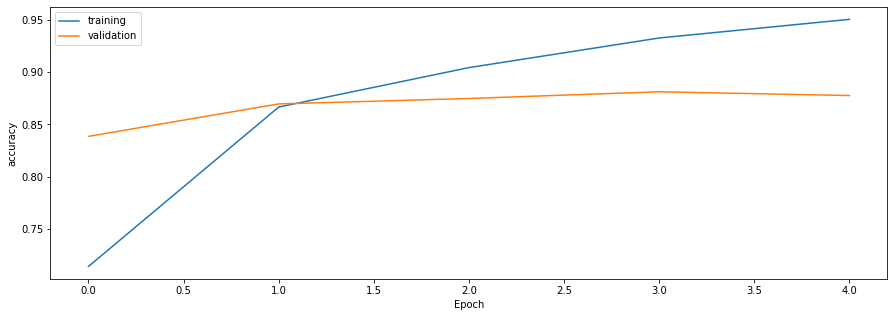

In [33]:
plt.figure(figsize=(15,5))

plt.plot( model_history.history['accuracy'])
plt.plot( model_history.history['val_accuracy'])

plt.legend(['training' , 'validation'] , loc='best')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.show()

In [34]:
sentence_result = model.evaluate(X_test, y_test) 
print('accuracy - ' , sentence_result[1])

782/782 [==============================] - 11s 14ms/step - loss: 0.3818 - accuracy: 0.8706
accuracy -  0.870639979839325
